# EDA Notebook

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
#Plotting caracteristics.

font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
figure_size = (15,10)

In [7]:
df_agri = pd.read_csv("../data/agreste.csv")
df_agri.head()

,Unnamed: 0,n1,n2,n3,n4,n5,n6,departement,dpt,variable,value,year
0,16622,"Céréales, oléagineux, protéagineux",Céréales,Blé,Blé tendre et épeautre,Blé tendre d'hiver et épeautre,Blé tendre d'hiver et épeautre,Guadeloupe,971,Production (volume),NaN,2009
1,16626,"Céréales, oléagineux, protéagineux",Céréales,Orge et escourgeon,Orge d'hiver et escourgeon,Orge d'hiver et escourgeon,Orge d'hiver et escourgeon,Guadeloupe,971,Production (volume),NaN,2009
2,16736,"Céréales, oléagineux, protéagineux",Céréales,Blé,Blé tendre et épeautre,Blé tendre d'hiver et épeautre,Blé tendre d'hiver et épeautre,Martinique,972,Production (volume),NaN,2009
3,16740,"Céréales, oléagineux, protéagineux",Céréales,Orge et escourgeon,Orge d'hiver et escourgeon,Orge d'hiver et escourgeon,Orge d'hiver et escourgeon,Martinique,972,Production (volume),NaN,2009
4,16850,"Céréales, oléagineux, protéagineux",Céréales,Blé,Blé tendre et épeautre,Blé tendre d'hiver et épeautre,Blé tendre d'hiver et épeautre,Guyane,973,Production (volume),NaN,2009


In [8]:
drop_columns = ['Unnamed: 0', 'n1', 'n2', 'n3', 'n4', 'n5', 'departement']
df_agri.drop(columns=drop_columns, inplace=True)
df_agri.head()

,n6,dpt,variable,value,year
0,Blé tendre d'hiver et épeautre,971,Production (volume),NaN,2009
1,Orge d'hiver et escourgeon,971,Production (volume),NaN,2009
2,Blé tendre d'hiver et épeautre,972,Production (volume),NaN,2009
3,Orge d'hiver et escourgeon,972,Production (volume),NaN,2009
4,Blé tendre d'hiver et épeautre,973,Production (volume),NaN,2009


In [14]:
condition = (df_agri['dpt'] == '28') | (df_agri['dpt'] == '27')
df_agri[condition]

,n6,dpt,variable,value,year
26,Blé tendre d'hiver et épeautre,28,Production (volume),13788375.0,2009
27,Orge d'hiver et escourgeon,28,Production (volume),4263792.0,2009
54,Blé tendre d'hiver et épeautre,27,Production (volume),13867672.0,2009
55,Orge d'hiver et escourgeon,27,Production (volume),2313044.0,2009
242,Blé tendre d'hiver et épeautre,28,Production (volume),16277994.0,2002
...,...,...,...,...,...
12515,Orge d'hiver et escourgeon,27,Rendement,82.0,2019
12990,Blé tendre d'hiver et épeautre,28,Rendement,74.0,2006
12991,Orge d'hiver et escourgeon,28,Rendement,74.0,2006
13036,Blé tendre d'hiver et épeautre,27,Rendement,77.0,2006


In [43]:
list_dpt = ['27', '28']
list_agri = ["Blé tendre d'hiver et épeautre", "Orge d'hiver et escourgeon"]
list_variable = ['Production (volume)', 'Rendement', 'Superficie développée']

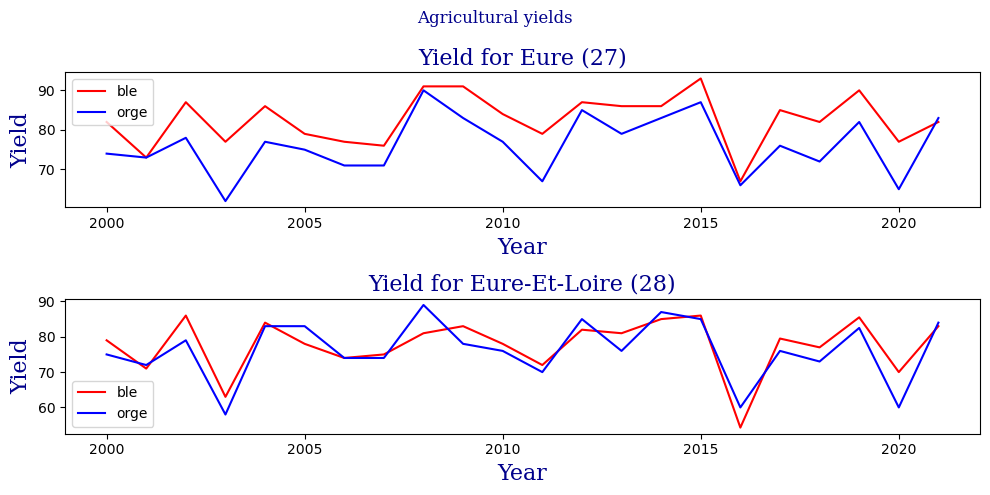

In [51]:
fig, axs = plt.subplots(2, figsize=(10,5))
fig.suptitle('Agricultural yields', fontdict=font)

condition_plot_ble = (df_agri['dpt'] == '27') & (df_agri['n6'] == "Blé tendre d'hiver et épeautre") & (df_agri['variable'] == 'Rendement')
df_plot_ble = df_agri[condition_plot_ble].copy()
df_plot_ble = df_plot_ble.set_index('year').sort_index()

condition_plot_orge = (df_agri['dpt'] == '27') & (df_agri['n6'] == "Orge d'hiver et escourgeon") & (df_agri['variable'] == 'Rendement')
df_plot_orge = df_agri[condition_plot_orge].copy()
df_plot_orge = df_plot_orge.set_index('year').sort_index()

axs[0].set_title('Yield for Eure (27)', fontdict=font)
axs[0].plot(df_plot_ble.index, df_plot_ble['value'], color='red', label='ble')
axs[0].plot(df_plot_ble.index, df_plot_orge['value'], color='blue', label='orge')
axs[0].set_xlabel('Year', fontdict=font)
axs[0].set_ylabel('Yield', fontdict=font)
axs[0].legend()

condition_plot_ble = (df_agri['dpt'] == '28') & (df_agri['n6'] == "Blé tendre d'hiver et épeautre") & (df_agri['variable'] == 'Rendement')
df_plot_ble = df_agri[condition_plot_ble].copy()
df_plot_ble = df_plot_ble.set_index('year').sort_index()

condition_plot_orge = (df_agri['dpt'] == '28') & (df_agri['n6'] == "Orge d'hiver et escourgeon") & (df_agri['variable'] == 'Rendement')
df_plot_orge = df_agri[condition_plot_orge].copy()
df_plot_orge = df_plot_orge.set_index('year').sort_index()

axs[1].set_title('Yield for Eure-Et-Loire (28)', fontdict=font)
axs[1].plot(df_plot_ble.index, df_plot_ble['value'], color='red', label='ble')
axs[1].plot(df_plot_ble.index, df_plot_orge['value'], color='blue', label='orge')
axs[1].set_xlabel('Year', fontdict=font)
axs[1].set_ylabel('Yield', fontdict=font)
axs[1].legend()

plt.tight_layout()
plt.show()

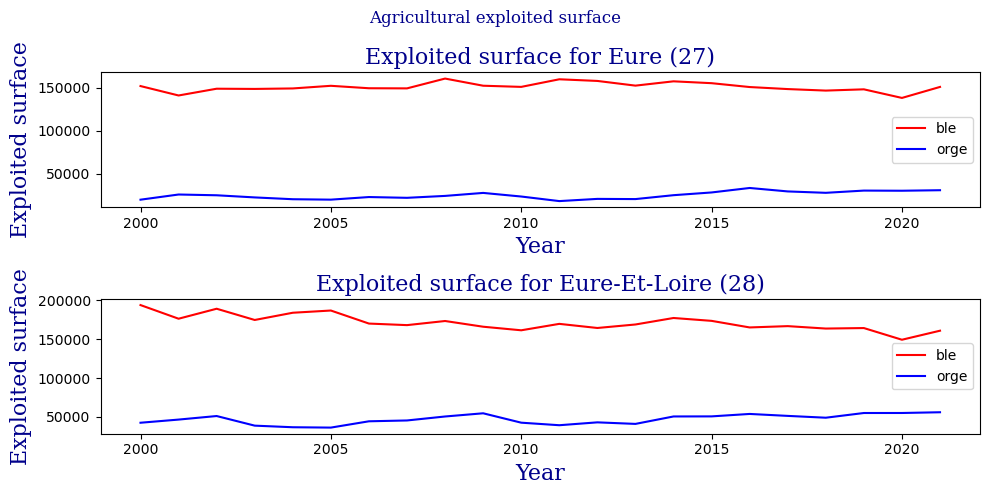

In [52]:
fig, axs = plt.subplots(2, figsize=(10,5))
fig.suptitle('Agricultural exploited surface', fontdict=font)

condition_plot_ble = (df_agri['dpt'] == '27') & (df_agri['n6'] == "Blé tendre d'hiver et épeautre") & (df_agri['variable'] == 'Superficie développée')
df_plot_ble = df_agri[condition_plot_ble].copy()
df_plot_ble = df_plot_ble.set_index('year').sort_index()

condition_plot_orge = (df_agri['dpt'] == '27') & (df_agri['n6'] == "Orge d'hiver et escourgeon") & (df_agri['variable'] == 'Superficie développée')
df_plot_orge = df_agri[condition_plot_orge].copy()
df_plot_orge = df_plot_orge.set_index('year').sort_index()

axs[0].set_title('Exploited surface for Eure (27)', fontdict=font)
axs[0].plot(df_plot_ble.index, df_plot_ble['value'], color='red', label='ble')
axs[0].plot(df_plot_ble.index, df_plot_orge['value'], color='blue', label='orge')
axs[0].set_xlabel('Year', fontdict=font)
axs[0].set_ylabel('Exploited surface', fontdict=font)
axs[0].legend()

condition_plot_ble = (df_agri['dpt'] == '28') & (df_agri['n6'] == "Blé tendre d'hiver et épeautre") & (df_agri['variable'] == 'Superficie développée')
df_plot_ble = df_agri[condition_plot_ble].copy()
df_plot_ble = df_plot_ble.set_index('year').sort_index()

condition_plot_orge = (df_agri['dpt'] == '28') & (df_agri['n6'] == "Orge d'hiver et escourgeon") & (df_agri['variable'] == 'Superficie développée')
df_plot_orge = df_agri[condition_plot_orge].copy()
df_plot_orge = df_plot_orge.set_index('year').sort_index()

axs[1].set_title('Exploited surface for Eure-Et-Loire (28)', fontdict=font)
axs[1].plot(df_plot_ble.index, df_plot_ble['value'], color='red', label='ble')
axs[1].plot(df_plot_ble.index, df_plot_orge['value'], color='blue', label='orge')
axs[1].set_xlabel('Year', fontdict=font)
axs[1].set_ylabel('Exploited surface', fontdict=font)
axs[1].legend()

plt.tight_layout()
plt.show()

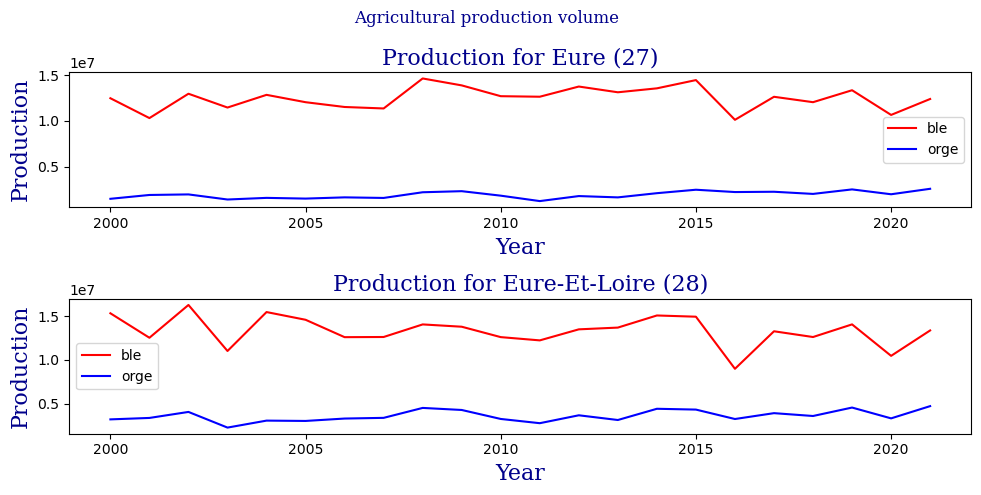

In [53]:
fig, axs = plt.subplots(2, figsize=(10,5))
fig.suptitle('Agricultural production volume', fontdict=font)

condition_plot_ble = (df_agri['dpt'] == '27') & (df_agri['n6'] == "Blé tendre d'hiver et épeautre") & (df_agri['variable'] == 'Production (volume)')
df_plot_ble = df_agri[condition_plot_ble].copy()
df_plot_ble = df_plot_ble.set_index('year').sort_index()

condition_plot_orge = (df_agri['dpt'] == '27') & (df_agri['n6'] == "Orge d'hiver et escourgeon") & (df_agri['variable'] == 'Production (volume)')
df_plot_orge = df_agri[condition_plot_orge].copy()
df_plot_orge = df_plot_orge.set_index('year').sort_index()

axs[0].set_title('Production for Eure (27)', fontdict=font)
axs[0].plot(df_plot_ble.index, df_plot_ble['value'], color='red', label='ble')
axs[0].plot(df_plot_ble.index, df_plot_orge['value'], color='blue', label='orge')
axs[0].set_xlabel('Year', fontdict=font)
axs[0].set_ylabel('Production', fontdict=font)
axs[0].legend()

condition_plot_ble = (df_agri['dpt'] == '28') & (df_agri['n6'] == "Blé tendre d'hiver et épeautre") & (df_agri['variable'] == 'Production (volume)')
df_plot_ble = df_agri[condition_plot_ble].copy()
df_plot_ble = df_plot_ble.set_index('year').sort_index()

condition_plot_orge = (df_agri['dpt'] == '28') & (df_agri['n6'] == "Orge d'hiver et escourgeon") & (df_agri['variable'] == 'Production (volume)')
df_plot_orge = df_agri[condition_plot_orge].copy()
df_plot_orge = df_plot_orge.set_index('year').sort_index()

axs[1].set_title('Production for Eure-Et-Loire (28)', fontdict=font)
axs[1].plot(df_plot_ble.index, df_plot_ble['value'], color='red', label='ble')
axs[1].plot(df_plot_ble.index, df_plot_orge['value'], color='blue', label='orge')
axs[1].set_xlabel('Year', fontdict=font)
axs[1].set_ylabel('Production', fontdict=font)
axs[1].legend()

plt.tight_layout()
plt.show()